# Project_03 - EDA (Shopping)

**Project description**

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

For this project, the goal is to clean, explore, analyze, and prepare a report that gives insight into the shopping habits of Instacart customers. Additionally, plots will be graphed to communicate the results.

**Workflow**

**Load datasets**
<br>--instacart_orders.csv: each row corresponds to one order on the Instacart app.
<br>--products.csv: each row corresponds to a unique product that customers can buy.
<br>--order_products.csv: each row corresponds to one item placed in an order.
<br>--aisles.csv: aisle names and IDs.
<br>--departments.csv: department names and IDs.

The files have nonstandard formatting (use certain arguments in pd.read_csv() to read the data correctly).
<br>Take a look at the CSV files to get a sense of what those arguments should be.
<br>When a DataFrame has too many rows, info() will not print the non-null counts (use show_counts=True).

**perform EDA**
<br>.Verify and fix data types
<br>.Identify and fill in missing values
<br>.Identify and remove duplicate values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_orders = pd.read_csv('datasets/project_14_dataset_orders.csv')
display(df_orders.head())
df_orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [3]:
df_products = pd.read_csv('datasets/project_14_dataset_products.csv')
display(df_products.head())
df_products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
df_aisles = pd.read_csv('datasets/project_14_dataset_aisles.csv')
display(df_aisles.head())
df_aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
df_departments = pd.read_csv('datasets/project_14_dataset_departments.csv')
#display(df_departments)

grocery_list = [1, 3, 4, 7, 9, 12, 13, 14, 15, 16, 19, 20]

def product_category(row):
    product = row['department_id']
    if product in grocery_list:
        return 'grocery'
    else:
        return 'other'

df_departments['category'] = df_departments.apply(product_category, axis=1).astype('category')
display(df_departments)

df_departments.info()

,department_id,department,category
0,1,frozen,grocery
1,2,other,other
2,3,bakery,grocery
3,4,produce,grocery
4,5,alcohol,other
5,6,international,other
6,7,beverages,grocery
7,8,pets,other
8,9,dry goods pasta,grocery
9,10,bulk,other


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   department_id  21 non-null     int64   
 1   department     21 non-null     object  
 2   category       21 non-null     category
dtypes: category(1), int64(1), object(1)
memory usage: 609.0+ bytes


I have added the 'Category' column to separate general grocery category from other categories.

In [6]:
df_order_products = pd.read_csv('datasets/project_14_dataset_order_products.csv')
display(df_order_products.head())
df_order_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


**Summary of Observations**
1. df_orders: There are some missing values in 'days_since_prior_order' column. The columns types are ok.
2. df_products: There are some missing values in 'product_name; column'. The columns types are ok.
3. df_aisles: There are no missing values. The columns types are ok.
4. df_departments: There are no missing values. The columns types are ok.
5. df_order_products: there are some missing values in 'dadd_to_cart_order' column.
<br>  The columns types are ok. (It's a little odd that the 'add_to_cart_order' column is a float64 type.)

In [7]:
# df_orders.to_csv('~/work/project_datasets/project_14_dataset_1.csv', index=False, header=list(df_orders.columns))
# df_products.to_csv('~/work/project_datasets/project_14_dataset_2.csv', index=False, header=list(df_products.columns))
# df_aisles.to_csv('~/work/project_datasets/project_14_dataset_3.csv', index=False, header=list(df_aisles.columns))
# df_departments.to_csv('~/work/project_datasets/project_14_dataset_4.csv', index=False, header=list(df_departments.columns))
# df_order_products.to_csv('~/work/project_datasets/project_14_dataset_5.csv', index=False, header=list(df_order_products.columns))

## Find and remove duplicate values

### orders

In [8]:
# Check for duplicated orders
display(df_orders.duplicated().sum())
display(df_orders[df_orders.duplicated()].sort_values(by='order_id'))

15

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
371905,391768,57671,19,3,2,10.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
273805,1112182,202304,84,3,2,6.0
411408,1286742,183220,48,3,2,4.0
266232,1782114,106752,1,3,2,NaN
230807,1918001,188546,14,3,2,16.0
323900,1919531,191501,32,3,2,7.0


In [9]:
# Check for all orders placed Wednesday at 2:00 AM
# display(df_orders[(df_orders['order_dow']==2) & (df_orders['order_hour_of_day']==2)])
display(df_orders.query('order_dow == 3 and order_hour_of_day == 2'))
display(df_orders.query('order_dow == 3 and order_hour_of_day == 2').duplicated().sum())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


15

In [10]:
# Remove duplicate orders (There are only 15 fully duplicate rows)
df_orders.drop_duplicates(inplace=True)

**I dropped all the fully duplicate rows, and saving to the orifinal df. (inplace=True)**

In [11]:
# Double check for duplicate rows
df_orders.duplicated().sum()

0

**I rechecked for any fully duplicate rows, and all of them have been removed.**

In [12]:
# Double check for duplicate order IDs only
df_orders['order_id'].duplicated().sum()

0

**I checked for duplicate rows specifically in the 'order_id' column, and there weren't any duplicated order_ids.**

**Summary of Observations**
1. I checked for fully duplicate rows, and found 15 duplicates at 'order_dow=3' and 'order_hour_of_day==2'.
<br>  I'm guessing there were some type of system glitch/error at this specific hour.
2. I dropped/removed all the fully duplicate rows, and saved to the original df. (inplace=True)
3. I checked for duplicate rows specifically in specific columns, and there weren't any duplicated order_ids.

### products

In [13]:
# Check for fully duplicate rows
df_products.info()
display(df_products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


0

**I checked for fully duplicate rows, and there weren't any duplicated order_ids.**

In [14]:
# Check for just duplicate product IDs
df_products['product_id'].duplicated().sum()

0

**I checked for duplicate rows specifically in the 'product_id' column, and there weren't any duplicated product_ids.**

In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'] = df_products['product_name'].str.lower()
display(df_products.head())
#display(df_products[df_products['product_name'].duplicated()])
display(df_products['product_name'].duplicated().sum())

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


1361

**I checked for duplicate rows specifically in the 'product_name' column, and there were 1361 duplicated product_names.**

In [16]:
# Check for duplicate product names that aren't missing
display(df_products[df_products['product_name'].isna()]['product_name'].duplicated().sum())
display(df_products[~df_products['product_name'].isna()]['product_name'].duplicated().sum())
display(df_products[~df_products['product_name'].isna()]['product_id'].duplicated().sum())

1257

104

0

**'product_name' duplicates are mostly just missing product names
missing names = 1257, duplicate names = 104**
<br>As checked earlier, all the product_id are unique, which means the system would recognize them as different products. <br>Hence, it may be better to keep these rows and try to fix the product_name column later. 

### departments

In [17]:
df_departments.info()
display(df_departments.duplicated().sum())
display(df_departments['department'].duplicated().sum())
display(df_departments['department_id'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   department_id  21 non-null     int64   
 1   department     21 non-null     object  
 2   category       21 non-null     category
dtypes: category(1), int64(1), object(1)
memory usage: 609.0+ bytes


0

0

0

**I checked for fully duplicate rows and in specific columns, and there weren't any duplicates.**

### `aisles` data frame

In [18]:
display(df_aisles.head())
display(df_aisles.duplicated().sum())
display(df_aisles['aisle'].duplicated().sum())
display(df_aisles['aisle_id'].duplicated().sum())

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


0

0

0

**I checked for fully duplicate rows and in specific columns, and there weren't any duplicates.**

### `order_products` data frame

In [19]:
# Check for fullly duplicate rows
df_order_products.info(show_counts=True)
display(df_order_products.head())
display(df_order_products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


0

**I checked for fully duplicate rows, and there weren't any duplicates.**

In [20]:
# Double check for any other tricky duplicates
display(df_order_products[['order_id','product_id','add_to_cart_order']].duplicated().sum())
display(df_order_products[['order_id','add_to_cart_order']].duplicated().sum())
display(df_order_products[df_order_products[['order_id','add_to_cart_order']].duplicated()])
#df_order_products.drop_duplicates(subset=['order_id','add_to_cart_order'], inplace=True)
#df_order_products.info(show_counts=True)

0

766

,order_id,product_id,add_to_cart_order,reordered
64336,1717990,39408,NaN,0
70057,264710,41602,NaN,0
128360,2449164,14386,NaN,0
137029,3347453,30727,NaN,0
137958,2136777,45106,NaN,0
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


**There are 766 duplicates in the ['orders', 'add_to_cart_order'] subset.
<br>This means some products were added to an order without a ['add_to_cart_order']**

**Section Summary**
1. I checked for fully duplicate rows, and in specific columns of the df.
2. I dropped/removed the fully duplicate rows when necessary.
3. I kept some duplicate rows in specific columns as dropping them may affect the final analyses.

## Find and remove missing values


### `products` data frame

In [21]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [22]:
# Are all of the missing product names associated with aisle ID 100?
display(df_products[df_products['product_name'].isna()])
display(df_products[df_products['product_name'].isna()][['aisle_id']].value_counts())

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


aisle_id
100         1258
dtype: int64

**Yes, all of the missing product names are associated with aisle ID 100.**

In [23]:
# Are all of the missing product names associated with department ID 21?
display(df_products[df_products['product_name'].isna()][['department_id']].value_counts())

department_id
21               1258
dtype: int64

**Yes, all of the missing product names are associated with department ID 21.**

In [24]:
# What is this aisle and department?
display(df_aisles[df_aisles['aisle_id']==100])
display(df_departments[df_departments['department_id']==21])

,aisle_id,aisle
99,100,missing


,department_id,department,category
20,21,missing,other


**Both the aisle name and department name are missing.**

In [25]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
display(df_products['product_name'].isna().sum())

0

**I filled all the missing product names with 'Unknown' and rechecked for any missing product_names.**

### orders

In [26]:
df_orders.info()
display(df_orders.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [27]:
# Are there any missing values where it's not a customer's first order?
display(df_orders['order_number'].min())
display(df_orders[df_orders['order_number']!=1].isna().sum())

1

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

**No, there aren't any missing values where it's not a customer's 1st order.**

### order_products

In [28]:
df_order_products.info(show_counts=True)
display(df_order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [29]:
# What are the min and max values in this column?
display(df_order_products[['add_to_cart_order']].agg(['min','max']))

,add_to_cart_order
min,1.0
max,64.0


In [30]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
filtered_order_id = list(df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'])
display(len(filtered_order_id))

836

In [31]:
# Do all orders with missing values have more than 64 products?
display(df_order_products[df_order_products['order_id'].isin(filtered_order_id)][['order_id']].value_counts())

order_id
61355       127
3308010     115
2136777     108
171934      104
1959075      98
           ... 
888470       65
1598369      65
747668       65
1677118      65
9310         65
Length: 70, dtype: int64

**Yes, all orders with missing values have more than 64 products.**

In [32]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


**I filled all the missing product names with '999' and convert column to integer type.
<br> Then I rechecked for any missing values and the data types.**

**Section Summary**
1. I checked for missing values in the df, and looked for common denominators for these missing values.
2. I filled the missing values with specific values as necessary.
<br>  There were 1258 missing values in the 'product_name' which needs to be correctly addressed. (Alon
3. I changed the datatype of a column to a more appropriate one. (float64 -> int64)
4. All order IDs with at least one missing value in 'add_to_cart_order' have more than 64 products.
<br>  I think 'add_to_cart_order' is maybe capped at 64, which caused this missing value issue.

# Task series: A

### A1: Verify that the 'order_hour_of_day' and 'order_dow' values in the orders tables are sensible (i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6)

In [33]:
display(len(df_orders['order_hour_of_day'].unique()))
display(df_orders['order_hour_of_day'].unique())

24

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4], dtype=int64)

In [34]:
display(len(df_orders['order_dow'].unique()))
display(sorted(df_orders['order_dow'].unique()))

7

[0, 1, 2, 3, 4, 5, 6]

**Yes, the 'order_hour_of_day' and 'order_dow' values in the orders tables seem to be sensible.**

### [A2] What time of day do people shop for groceries?

In [35]:
new_df1 = df_order_products.merge(df_orders, on='order_id', how='left')
new_df2 = new_df1.merge(df_products, on='product_id', how='left')
new_df3 = new_df2.merge(df_departments, on='department_id', how='left')
df_combined = new_df3.merge(df_aisles, on='aisle_id', how='left')
#display(new_df1.head())
#display(new_df2.head())
#display(new_df3.head())
display(df_combined.head(3))
#df_combined.info(show_counts=True)
#df_order_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,category,aisle
0,2141543,11440,17,0,58454,25,0,15,8.0,chicken breast tenders breaded,129,1,frozen,grocery,frozen appetizers sides
1,567889,1560,1,1,129474,16,1,13,14.0,bag of ice,37,1,frozen,grocery,ice cream ice
2,2261212,26683,1,1,47476,5,6,9,13.0,cafe latte pure lightly sweetened iced coffee ...,91,16,dairy eggs,grocery,soy lactosefree


order_hour_of_day
10                   361403
11                   359619
14                   350024
13                   348832
15                   346930
12                   339869
16                   332176
9                    320330
17                   272095
8                    224242
18                   211230
19                   161431
20                   127172
7                    117115
21                   105121
22                    83337
23                    52596
6                     36668
0                     28986
1                     15394
5                     11327
2                      8088
4                      6874
3                      6700
dtype: int64

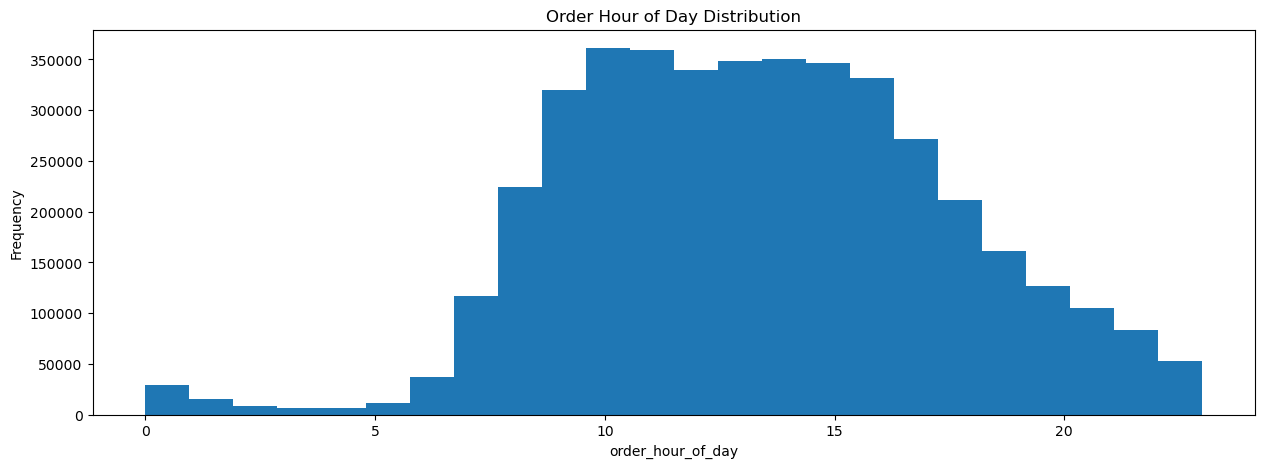

In [36]:
display(df_combined[df_combined['category']=='grocery'][['order_hour_of_day']].value_counts())

df_combined[df_combined['category']=='grocery']['order_hour_of_day'].plot(kind='hist', bins=24, title='Order Hour of Day Distribution', ylabel='Frequency', figsize=[15,5])
plt.xlabel('order_hour_of_day')
plt.show()

**It seems like 8am - 6pm are the busiest hours for grocery shopping.**

### [A3] What day of the week do people shop for groceries?

0    811409
1    742307
6    586769
2    549455
5    547136
3    495927
4    494556
Name: order_dow, dtype: int64

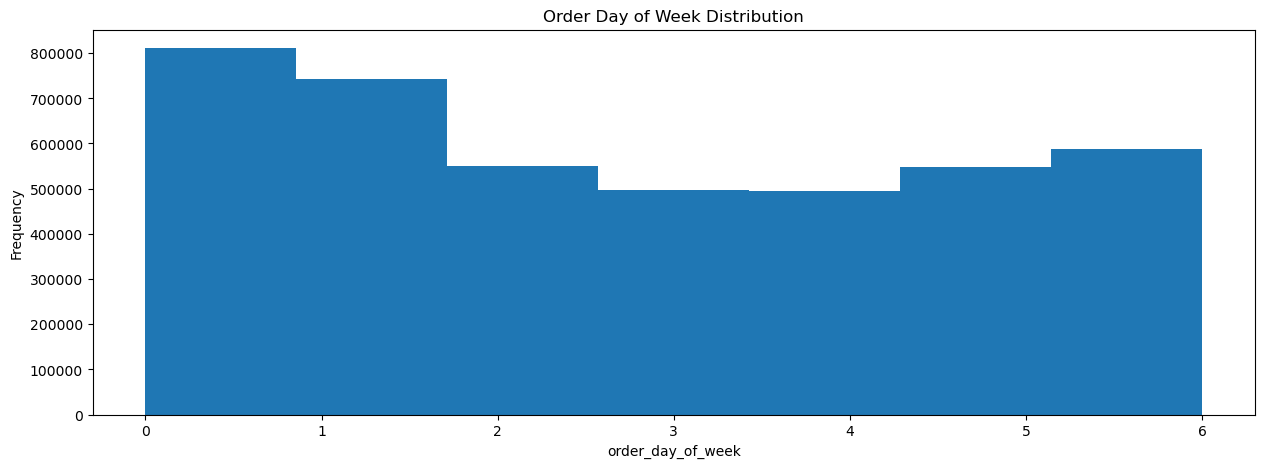

In [37]:
display(df_combined[df_combined['category']=='grocery']['order_dow'].value_counts())
df_combined[df_combined['category']=='grocery']['order_dow'].plot(kind='hist', bins=7, title='Order Day of Week Distribution', ylabel='Frequency', figsize=[15,5])
plt.xlabel('order_day_of_week')
plt.show()

**It seems like Sundays and Mondays are the busiest days for grocery shopping.**

### [A4] How long do people wait until placing another order?

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


11.101813900274362

days_since_prior_order
30.0                      51337
7.0                       44577
6.0                       33930
4.0                       31006
3.0                       30224
5.0                       30096
2.0                       27138
8.0                       25361
1.0                       20179
9.0                       16753
14.0                      13992
10.0                      13309
13.0                      11737
11.0                      11467
12.0                      10658
0.0                        9589
15.0                       9416
16.0                       6587
21.0                       6448
17.0                       5498
20.0                       5302
18.0                       4971
19.0                       4939
22.0                       4514
28.0                       3745
23.0                       3337
24.0                       3015
27.0                       2986
25.0                       2711
29.0                       2673
26.0             

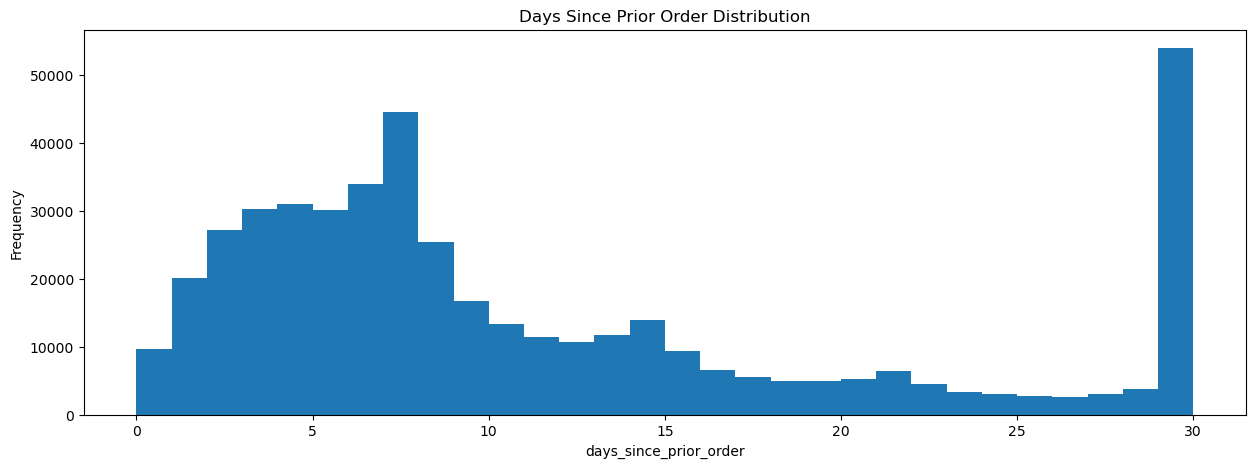

In [38]:
display(df_orders.head())
display(df_orders['days_since_prior_order'].mean())
display(df_orders[['days_since_prior_order']].value_counts())

df_orders['days_since_prior_order'].plot(kind='hist', bins=30, title='Days Since Prior Order Distribution', ylabel='Frequency', figsize=[15,5])
plt.xlabel('days_since_prior_order')
plt.show()

**It seems like people on average wait 11.1 days before placing another order.
<br>But, looking at value distribution more closely, 30 days has the highest frequency. (Frequency: 30 days > 1 week > 2 weeks).**

**Observation Summary**
    
1. It appears that 8am - 6pm are the busiest hours for users to do grocery shopping.
2. It appears that Sundays and Mondays are the busiest days for users to do grocery shopping.
3. It appears that people on average wait 11.1 days before placing another order on the platform.
<br>But, looking at value distribution more closely, 30 days has the highest frequency. (Frequency: 30 days > 1 week > 2 weeks).

# Task series: B

### [B1] Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [39]:
df_orders_wed = df_orders[df_orders['order_dow']==3]
df_orders_sat = df_orders[df_orders['order_dow']==6]
#df_orders_sun = df_orders[df_orders['order_dow']==0]
#df_orders_thu = df_orders[df_orders['order_dow']==4]
display(df_orders_wed.head(3))
display(df_orders_sat.head(3))
display(df_orders['order_dow'].value_counts())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
6,2511640,148233,40,3,8,2.0
16,3109465,55090,19,3,15,9.0
28,133707,182261,1,3,10,NaN


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
11,102585,191558,18,6,16,8.0
14,2843219,74699,4,6,11,30.0


0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64

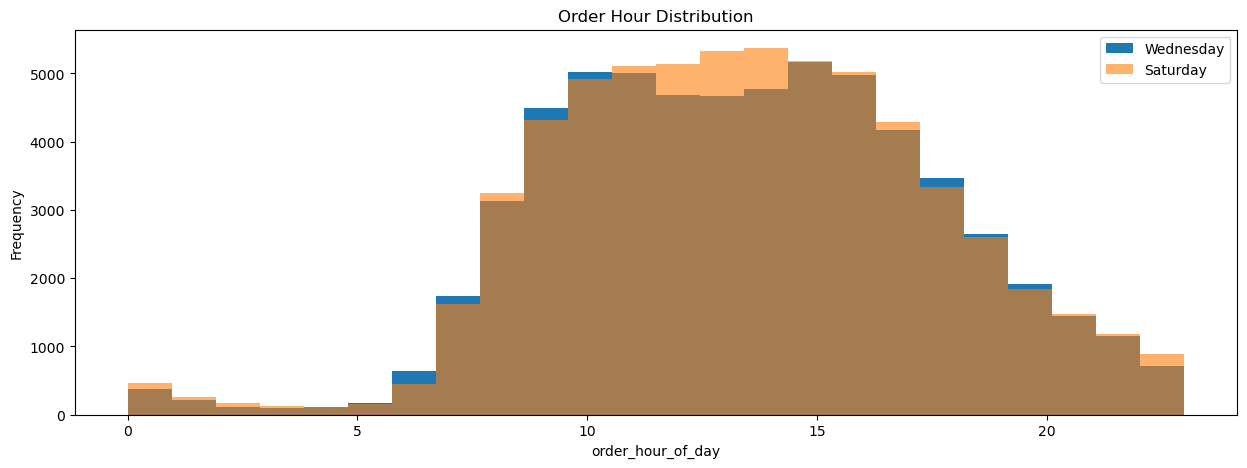

In [40]:
df_orders_wed['order_hour_of_day'].plot(kind='hist', bins=24, title='Order Hour Distribution', ylabel='Frequency', figsize=[15,5])
df_orders_sat['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.6)
plt.xlabel('order_hour_of_day')
#df_orders_sun['order_hour_of_day'].plot(kind='hist', bins=24, title='Order Hour Distribution', ylabel='Frequency')
#df_orders_thu['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.6)

plt.legend(['Wednesday', 'Saturday'])
#plt.legend(['Sunday', 'Thursday'])
plt.show()

**While the two graphs look quite similar, compared to Wednesdays, more people were shopping on Saturdays at round noon time(12-3pm).
<br>This is likely because Saturday is a weekend and people are off work and stays at home.**

### [B2] What's the distribution for the number of orders per customer?

In [41]:
display(df_orders[['user_id']].value_counts())

user_id
149605     28
193164     26
78375      25
66664      24
134511     24
           ..
56616       1
56614       1
56611       1
56608       1
54291       1
Length: 157437, dtype: int64

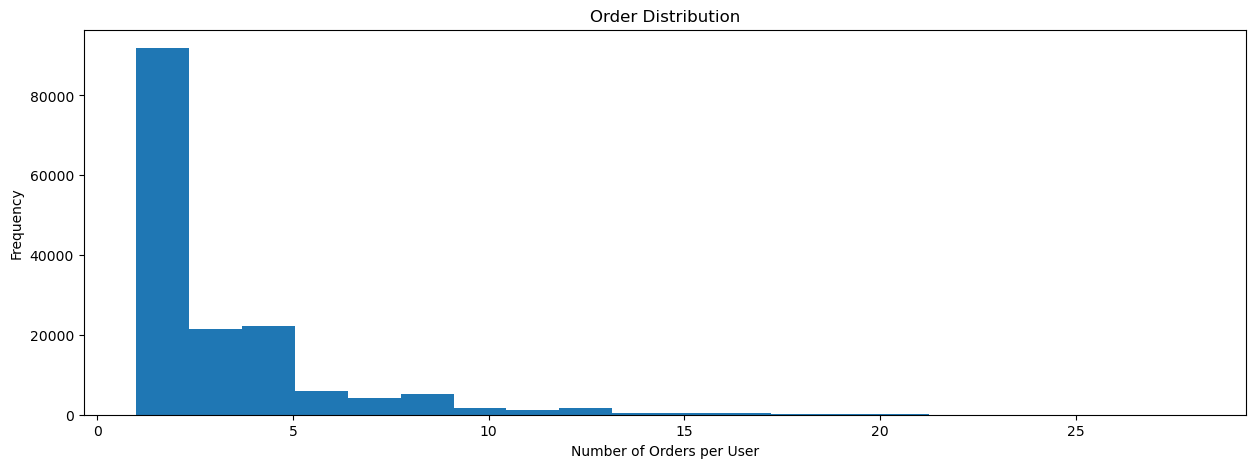

In [42]:
df_orders[['user_id']].value_counts().plot(kind='hist', title='Order Distribution', ylabel='Frequency', bins=20, figsize=[15,5])
plt.xlabel("Number of Orders per User")
plt.show()

**It seems like the typical number of orders per customer is between 1-5 orders.**

### [B3] What are the top 20 popular products (display their id and name)?

In [43]:
#display(df_order_products['product_id'].value_counts())
top_product_id = pd.DataFrame(df_order_products[['product_id']].value_counts().head(20))
display(top_product_id)

,0
product_id,
24852,66050
13176,53297
21137,37039
21903,33971
47209,29773
47766,24689
47626,21495
16797,20018
26209,19690


In [44]:
top_products_df = top_product_id.merge(df_products, how='left', on='product_id')
top_products = top_products_df[['product_id','product_name']]
#display(top_products_df)
display(top_products)

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,47626,large lemon
7,16797,strawberries
8,26209,limes
9,27845,organic whole milk


**Observation Summary**
1. Graphed the 'order_hour_of_day' distributions on Wednesdays and Saturdays. Though the graphs look quite similar, compared to Wednesdays, more people were shopping on Saturdays at round noon time (12 - 3pm). This is likely because Saturday is a weekend and people are off work and stays at home.
2. Graphed the distribution for the number of orders per customer. It appears that the typical number of orders per customer is between 1-5 orders.
3. Looked for the product_name and product_id of the top 20 popular products.

# [C] Task Series: C

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [45]:
display(df_order_products[['order_id']].value_counts())

order_id
61355       127
3308010     115
2136777     108
171934      104
1959075      98
           ... 
2231165       1
816908        1
2230951       1
112056        1
3421079       1
Length: 450046, dtype: int64

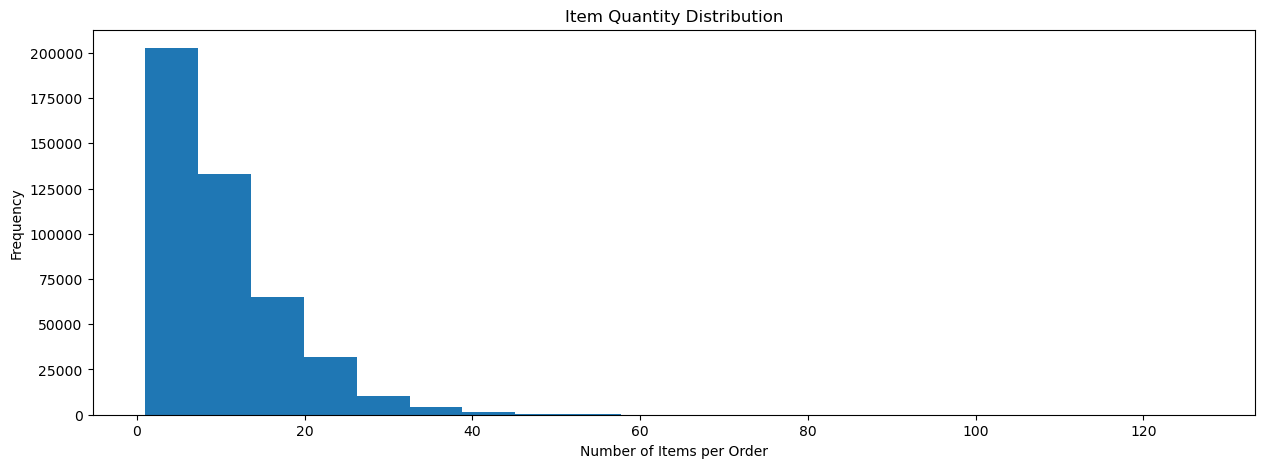

In [46]:
df_order_products[['order_id']].value_counts().plot(kind='hist', title='Item Quantity Distribution', ylabel='Frequency', 
                                                    bins = 20, figsize=[15,5])
plt.xlabel("Number of Items per Order")
plt.show()

**It seems like the typical number of items people buy in one order is between 1-15 items.**

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [47]:
df_order_products_ro = df_order_products[df_order_products['reordered']==1]
#display(df_order_products_ro[['product_id']].value_counts())
top_ro_product_id = pd.DataFrame(df_order_products_ro[['product_id']].value_counts().head(20))
display(top_ro_product_id)

,0
product_id,
24852,55763
13176,44450
21137,28639
21903,26233
47209,23629
47766,18743
27845,16251
47626,15044
27966,14748


In [48]:
top_ro_products_df = top_ro_product_id.merge(df_products, how='left', on='product_id')
top_ro_products = top_ro_products_df[['product_id','product_name']]
#display(top_products_df)
display(top_ro_products)

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,27845,organic whole milk
7,47626,large lemon
8,27966,organic raspberries
9,16797,strawberries


### [C3] For each product, what proportion of its orders are reorders?

In [49]:
#display(df_order_products[['product_id']].value_counts())
all_product_qty_df = pd.DataFrame(df_order_products[['product_id']].value_counts())

display(all_product_qty_df)

,0
product_id,
24852,66050
13176,53297
21137,37039
21903,33971
47209,29773
...,...
5836,1
43573,1
43570,1


In [50]:
#display(df_order_products_ro[['product_id']].value_counts())
ro_product_qty_df = pd.DataFrame(df_order_products_ro[['product_id']].value_counts())
display(ro_product_qty_df)

,0
product_id,
24852,55763
13176,44450
21137,28639
21903,26233
47209,23629
...,...
7092,1
21003,1
32856,1


In [51]:
all_ro_product_df = pd.concat([all_product_qty_df,ro_product_qty_df], axis=1)
all_ro_product_df.columns = ['all_qty', 'ro_qty']
all_ro_product_df['ro_proportion'] = all_ro_product_df['ro_qty'] / all_ro_product_df['all_qty']
display(all_ro_product_df.sort_values(by='all_qty', ascending=False))

,all_qty,ro_qty,ro_proportion
product_id,,,
24852,66050,55763.0,0.844254
13176,53297,44450.0,0.834006
21137,37039,28639.0,0.773212
21903,33971,26233.0,0.772217
47209,29773,23629.0,0.793639
...,...,...,...
33679,1,NaN,NaN
16401,1,NaN,NaN
2485,1,NaN,NaN


In [52]:
#ADDED BY REVIEWER
df_merge = df_order_products.merge(df_products)
reorder_rate = df_merge.groupby(['product_id', 'product_name'])['reordered'].mean().reset_index()
reorder_rate.head(20).sort_values(by='reordered', ascending=False).style.format({'reordered': '{:.1%}'})

,product_id,product_name,reordered
6,9,light strawberry blueberry yogurt,76.2%
2,3,robust golden unsweetened oolong tea,73.8%
19,25,salted caramel lean protein & fiber bar,67.5%
8,11,peach mango juice,62.5%
0,1,chocolate sandwich cookies,56.4%
13,18,pizza for one suprema frozen pizza,53.3%
3,4,smart ones classic favorites mini rigatoni with vodka cream sauce,51.0%
4,7,pure coconut water with orange,50.0%
16,22,fresh breath oral rinse mild mint,50.0%
10,13,saline nasal mist,50.0%


### [C4] For each customer, what proportion of their products ordered are reorders?

In [53]:
#display(df_combined[['user_id']].value_counts())
per_user_qty_df = pd.DataFrame(df_combined[['user_id']].value_counts())
display(per_user_qty_df)

,0
user_id,
103634,580
33731,540
137629,526
23371,506
164055,504
...,...
82057,1
114847,1
178865,1


In [54]:
df_combined_ro = df_combined[df_combined['reordered']==1]
#display(df_combined_ro.head())
#display(df_combined_ro[['user_id']].value_counts())
per_user_ro_qty_df = pd.DataFrame(df_combined_ro[['user_id']].value_counts())
display(per_user_ro_qty_df)

,0
user_id,
103634,477
164055,449
137629,444
33731,437
59819,436
...,...
77356,1
77348,1
193229,1


In [55]:
all_ro_per_user_qty_df = pd.concat([per_user_qty_df,per_user_ro_qty_df], axis=1)
all_ro_per_user_qty_df.columns = ['all_qty', 'ro_qty']
all_ro_per_user_qty_df['ro_proportion'] = all_ro_per_user_qty_df['ro_qty'] / all_ro_per_user_qty_df['all_qty']
display(all_ro_per_user_qty_df.sort_values(by='all_qty', ascending=False))

,all_qty,ro_qty,ro_proportion
user_id,,,
103634,580,477.0,0.822414
33731,540,437.0,0.809259
137629,526,444.0,0.844106
23371,506,428.0,0.845850
164055,504,449.0,0.890873
...,...,...,...
204604,1,NaN,NaN
24793,1,NaN,NaN
53049,1,1.0,1.000000


In [56]:
#ADDED BY REVIEWER
reorder_pct = df_order_products.merge(df_orders)
reorder_pct = reorder_pct.groupby('user_id')['reordered'].mean().to_frame()
reorder_pct.head(20).style.format({'reordered': '{:.1%}'})

,reordered
user_id,
2,3.8%
4,0.0%
5,66.7%
6,0.0%
7,92.9%
11,20.0%
12,25.0%
13,56.5%
14,36.1%


### [C5] What are the top 20 items that people put in their carts first? 

In [57]:
df_order_products_fi = df_order_products[df_order_products['add_to_cart_order']==1]
#display(df_order_products_fi[['product_id']].value_counts())
top_product_fi = pd.DataFrame(df_order_products_fi[['product_id']].value_counts().head(20))
top_product_fi.columns = ['count']
display(top_product_fi)

,count
product_id,
24852,15562
13176,11026
27845,4363
21137,3946
47209,3390
21903,3336
47766,3044
19660,2336
16797,2308


In [58]:
top_fi_products_df = top_product_fi.merge(df_products, how='left', on='product_id')
top_fi_products = top_fi_products_df[['product_id','product_name', 'count']]
#display(top_fi_products_df)
display(top_fi_products)

,product_id,product_name,count
0,24852,banana,15562
1,13176,bag of organic bananas,11026
2,27845,organic whole milk,4363
3,21137,organic strawberries,3946
4,47209,organic hass avocado,3390
5,21903,organic baby spinach,3336
6,47766,organic avocado,3044
7,19660,spring water,2336
8,16797,strawberries,2308
9,27966,organic raspberries,2024


**Observation Summary**
1. Graphed the distribution of items people typically buy in one order. It appears that the typical number of items people buy in one order is between 1-15 items.
2. Looked for the product_name and product_id of the top 20 that are reordered most frequently.
3. Calculated what the proportion of each product’s orders are reorders.
4. Calculated what proportion of each customer’s products ordered are reorders.
5. Looked for the product_name and product_id of the top 20 that people put in their carts first.

**Overall Conclusions**
<br>.Overall, the datasets were reasonably clean and error free, but there were duplicate values and missing values that needed to be corrected. (There were a number of missing or duplicate product names)

<br>.**Insights & Recommendations**
<br>  1. More people do grocery shopping on Sundays and Mondays, and mostly between 8am-6pm.
<br>   -- It maybe good to put on separate promotions during the slower days and hours to boost sales.

<br>  2. There is a wide dichotomy in days before a user places another order. With 30 days being the most frequent and then within 1 week after the last order.
<br>   -- Since the max days before a user places another order is 30 days, I'm assuming the actual value is (>=30 days). It maybe great to send reminders to users who hasn't shopped in 2-3 weeks. Along with some type of special coupon or membership points for users who comes back after a prolonged period of time.

<br>  3. The top 20 most popular products and most reordered products overlap greatly. (as well as the items that people put in their carts first)
<br>   -- The platform could display these items prominently on the front/landing page to drive more sales.
<br>   -- Like other supermarkets, maybe it's best to have these items on sale in order to drive more traffic and in turn increase sales on the higher margin items.

<br>  4. Each customer's product reorder proportion and each product's reorder proportion has been calculated.
<br>   -- This data can be used to recommend items targeted for each customer's preferences. Also, with each product's reorder proportion, the platform could figure out what items to restock or drop, or if an item has specific issues that discourages reorder.  

<br>  5. The typical number of items people buy in one order is between 1-15 items.
<br>   -- Assuming one hasn't already been implemented, free shipping for orders beyond a certain amount of sales or number of items could be implemented to boost overall sales for each order.